#  1. Libraries and Data Description

In [215]:
# install and import necessary libraries.

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

# nltk.download('stopwords')                              # Download Stopwords.
# nltk.download('punkt')
# nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

In [216]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

In [217]:
# print the shape of the data
data.shape

(14640, 15)

In [218]:
# Describe the data
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [219]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [220]:
# Stastistical description of the numerical data
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


Comments:
- Missing or NaN data for the "negativereason confidence" dataset, hence a lesser count of data. 
- Outlier for the retweet_count 

In [221]:
data.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Lots of null data for some columns. 

#  2. Understand of data-column

In [222]:
#Drop all the columns except "text" and "Airline_sentiment"
data2=data.loc[:14640,['airline_sentiment','text']]

In [223]:
#Check the shape of the new dataset
data2.shape

(14640, 2)

In [224]:
# to display full dataframe information (Non-turncated Text column.)
pd.set_option('display.max_colwidth', None) 
# Print the first 5 rows of data
data2.head(-1)                                 

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
...,...,...
14634,negative,@AmericanAir right on cue with the delays👌
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10


#  3. Text pre-processing


In [225]:
# Remove html tag
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data2['text'] = data2['text'].apply(lambda x: strip_html(x))
data2.head(-1)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
...,...,...
14634,negative,@AmericanAir right on cue with the delays👌
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10


In [226]:
# Remove contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data2['text'] = data2['text'].apply(lambda x: replace_contractions(x))
data2.head(-1)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it
...,...,...
14634,negative,@AmericanAir right on cue with the delays👌
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. that is called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10


In [227]:
# Remove number
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data2['text'] = data2['text'].apply(lambda x: remove_numbers(x))
data2.head(-1)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it
...,...,...
14634,negative,@AmericanAir right on cue with the delays👌
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over minutes Late Flight. No warnings or communication until we were minutes Late Flight. that is called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry


In [228]:
data2['text'] = data2.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [229]:
data2.head(-1) 

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
...,...,...
14634,negative,"[@, AmericanAir, right, on, cue, with, the, delays👌]"
14635,positive,"[@, AmericanAir, thank, you, we, got, on, a, different, flight, to, Chicago, .]"
14636,negative,"[@, AmericanAir, leaving, over, minutes, Late, Flight, ., No, warnings, or, communication, until, we, were, minutes, Late, Flight, ., that, is, called, shitty, customer, svc]"
14637,neutral,"[@, AmericanAir, Please, bring, American, Airlines, to, #, BlackBerry]"


In [230]:
#remove special characters 
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text
data2.head(-1)

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
...,...,...
14634,negative,"[@, AmericanAir, right, on, cue, with, the, delays👌]"
14635,positive,"[@, AmericanAir, thank, you, we, got, on, a, different, flight, to, Chicago, .]"
14636,negative,"[@, AmericanAir, leaving, over, minutes, Late, Flight, ., No, warnings, or, communication, until, we, were, minutes, Late, Flight, ., that, is, called, shitty, customer, svc]"
14637,neutral,"[@, AmericanAir, Please, bring, American, Airlines, to, #, BlackBerry]"


In [231]:
# remove punctuations 
def remove_punctuation(words):
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words
data2['text'] = data2['text'].apply(lambda x: remove_punctuation(x))
data2.head(-1)

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
...,...,...
14634,negative,"[AmericanAir, right, on, cue, with, the, delays]"
14635,positive,"[AmericanAir, thank, you, we, got, on, a, different, flight, to, Chicago]"
14636,negative,"[AmericanAir, leaving, over, minutes, Late, Flight, No, warnings, or, communication, until, we, were, minutes, Late, Flight, that, is, called, shitty, customer, svc]"
14637,neutral,"[AmericanAir, Please, bring, American, Airlines, to, BlackBerry]"


In [232]:
# Conversion to lower case
def to_lowercase(words):
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words
data2['text'] = data2['text'].apply(lambda x: to_lowercase(x))
data2.head(-1)

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]"
3,negative,"[virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[virginamerica, and, it, is, a, really, big, bad, thing, about, it]"
...,...,...
14634,negative,"[americanair, right, on, cue, with, the, delays]"
14635,positive,"[americanair, thank, you, we, got, on, a, different, flight, to, chicago]"
14636,negative,"[americanair, leaving, over, minutes, late, flight, no, warnings, or, communication, until, we, were, minutes, late, flight, that, is, called, shitty, customer, svc]"
14637,neutral,"[americanair, please, bring, american, airlines, to, blackberry]"


In [233]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

data2['text'] = data2['text'].apply(lambda x: lemmatize_list(x))
data2.head(-1)

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, say]"
1,positive,"[virginamerica, plus, you, have, add, commercials, to, the, experience, tacky]"
2,neutral,"[virginamerica, i, do, not, today, must, mean, i, need, to, take, another, trip]"
3,negative,"[virginamerica, it, be, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, face, they, have, little, recourse]"
4,negative,"[virginamerica, and, it, be, a, really, big, bad, thing, about, it]"
...,...,...
14634,negative,"[americanair, right, on, cue, with, the, delay]"
14635,positive,"[americanair, thank, you, we, get, on, a, different, flight, to, chicago]"
14636,negative,"[americanair, leave, over, minutes, late, flight, no, warn, or, communication, until, we, be, minutes, late, flight, that, be, call, shitty, customer, svc]"
14637,neutral,"[americanair, please, bring, american, airlines, to, blackberry]"


In [234]:
# join the words in the list to convert back to text string in the dataframe and print the 5 first rows
def rejoin(words):
    return ' '.join(words)

data2['text'] = data2.apply(lambda row: rejoin(row['text']), axis=1)
data2.head(-1)

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to the experience tacky
2,neutral,virginamerica i do not today must mean i need to take another trip
3,negative,virginamerica it be really aggressive to blast obnoxious entertainment in your guests face they have little recourse
4,negative,virginamerica and it be a really big bad thing about it
...,...,...
14634,negative,americanair right on cue with the delay
14635,positive,americanair thank you we get on a different flight to chicago
14636,negative,americanair leave over minutes late flight no warn or communication until we be minutes late flight that be call shitty customer svc
14637,neutral,americanair please bring american airlines to blackberry


# 3. Vectorization 

In [190]:
# Vectorization with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_C = CountVectorizer()
data_features_C = vectorizer_C.fit_transform(data2['text'])

data_features_C = data_features_C.toarray()                        # Convert the data features to array.

data_features_C.shape

(14640, 12163)

In [193]:
# Vectorization with TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_T = TfidfVectorizer()
data_features_T = vectorizer_T.fit_transform(data2['text'])

data_features_T = data_features_T.toarray()

data_features_T.shape

(14640, 12163)

# 4. Fit and Evaluate Model 

## 4.1 With Countvectorizer vectorization 

In [164]:
labels = data2['airline_sentiment']
labels = labels.map({'negative':-1, 'neutral':0, 'positive':1})

In [165]:
labels

0        0
1        1
2        0
3       -1
4       -1
        ..
14635    1
14636   -1
14637    0
14638   -1
14639    0
Name: airline_sentiment, Length: 14640, dtype: int64

In [166]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(data_features_C, labels, test_size=0.3, random_state=42)

In [198]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=20, n_jobs=-1) # use of 100 trees

forest_C = forest.fit(X_train_C, y_train_C)

print(forest_C)

print(np.mean(cross_val_score(forest_C, data_features_C, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7300546448087433


In [201]:
# Predict the results for test data using the model built with Countvectorizer vectorization .
result_C = forest_C.predict(X_test_C)

In [202]:
result_C

array([ 1, -1, -1, ..., -1, -1, -1], dtype=int64)

[[2703   83   28]
 [ 497  341   46]
 [ 263   76  355]]


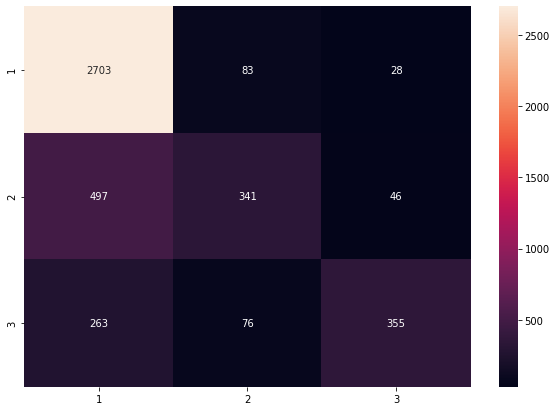

In [208]:
# Print and plot the confusion matrix 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat_C = confusion_matrix(y_test_C, result_C)

print(conf_mat_C)

df_cm = pd.DataFrame(conf_mat_C, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## 4.1 With TfidfVectorizer vectorization 

In [209]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(data_features_T, labels, test_size=0.3, random_state=42)

In [210]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_T = forest.fit(X_train_T, y_train_T)

print(forest_T)

print(np.mean(cross_val_score(forest_T, data_features_T, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7217213114754099


In [211]:
# Predict the results for test data using the model built with Countvectorizer vectorization .
result_T = forest_T.predict(X_test_T)

[[2722   72   20]
 [ 502  351   31]
 [ 311   90  293]]


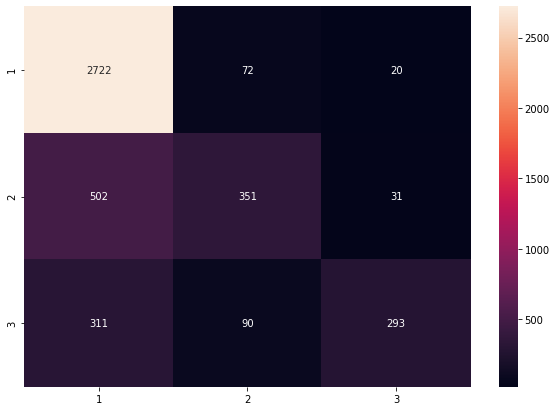

In [212]:
# Print and plot the confusion matrix 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat_T = confusion_matrix(y_test_T, result_T)

print(conf_mat_T)

df_cm = pd.DataFrame(conf_mat_T, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

# 6. Summary and findings

Let's take a look to the data features estimated by each vectorization type:  

### 1. Data features coming from the countvectorizer method

In [204]:
data_features_C.sum(axis=1) #sum for each column

array([ 4, 10, 11, ...,  7, 23, 27], dtype=int64)

This is the number of tokens for each review : 4 tokens in the first review, 10 tokens in the second review, etc. 

In [205]:
data_features_C.sum(axis=0) #sum for each column

array([1, 1, 1, ..., 1, 4, 1], dtype=int64)

As this is a bag of word, the frequency of the token is considered only in each corpus (each review here)

### 2. Data features coming from the Tf-IDFVectorizer method

In [206]:
data_features_T.sum(axis=1)#sum for each row

array([1.83202264, 2.77623962, 3.14702651, ..., 2.38986895, 4.11882894,
       4.24810628])

In [207]:
data_features_T.sum(axis=0)#sum of each column

array([0.39805477, 0.44959024, 0.49948111, ..., 0.28250709, 1.30157967,
       0.40255387])

Contrary to bag of word, the TF-IDF scheme weights individual tokens in the full collection of the corpus, hence float numbers and not integers. For instance, the first token which is virginamerica will be found in many reviews since the name of the airline looks to be at the beginning of each review (@AirlineName). The weight has been by consequence lowered. 

### 3. Observations

- Score with Countvectorizer vectorization: 0.7300546448087433 
- Score with TF-IDF vectorization method: 0.7217213114754099

With TF-IDF method, words appearing many times in the corpus will be considered as "noteworthy". However, for a good sentiment prediction, the name of the airline company should be important since it will be a strong contributor in the service provided. Here, because TF-IDF penalizes the redundancy, the name of the airline company is not an important feature or the machine learning model, which is not correct. This can explain why the Tf-IDF method is slighlty less performant than the Countvectorized method (which just count the frequency of tokens in each corpus).    

The use of stopword to keep only meanignful word could have been used in the pre-processing. The names of the company (virginamerica, americanair,etc.  ) could have been added to the stopword list. Another idea would have consisted in keeping the name of the airline as a second variable in the machine learning model.   